In [2]:
%matplotlib inline

import arviz as az
import matplotlib
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats

palette = 'muted'
sns.set_palette(palette)
sns.set_color_codes(palette)

In [3]:
# Load and preprocess the dataset
ans = sns.load_dataset('anscombe')
x_2 = ans[ans.dataset == 'II']['x'].values
y_2 = ans[ans.dataset == 'II']['y'].values
x_2 = x_2 - x_2.mean()
y_2 = y_2 - y_2.mean()

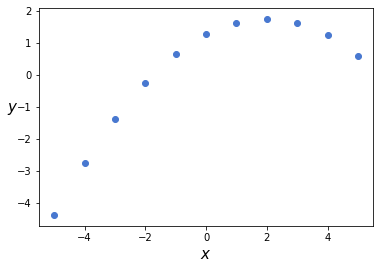

In [5]:
# Plot the data
plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation=0)
plt.savefig('example.png', dpi=300, figsize=(5.5, 5.5))

In [6]:
# Create a Bayesian polynomial regression model
with pm.Model() as model_poly:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta1 = pm.Normal('beta1', mu=0, sd=1)
    beta2 = pm.Normal('beta2', mu=0, sd=1)
    epsilon = pm.Uniform('epsilon', lower=0, upper=10)
    
    mu = alpha + beta1 * x_2 + beta2 * x_2**2
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_2)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_poly = pm.sample(3000, step=step, start=start)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '76716' (I am process '76924')


/Users/antonzabirko/miniconda3/envs/linear-regression/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -36, ||grad|| = 6.753:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -24.68, ||grad|| = 12.417:   0%|          | 10/5000 [00:00<00:03, 1490.99it/s]

logp = -18.161, ||grad|| = 15.314:   0%|          | 20/5000 [00:00<00:03, 1510.24it/s]

logp = -185.37, ||grad|| = 4,417.3:   1%|          | 30/5000 [00:00<00:04, 1202.31it/s]

logp = 6.4929, ||grad|| = 108.69:   1%|          | 40/5000 [00:00<00:03, 1335.34it/s]  

logp = -84,368, ||grad|| = 9.913e+06:   1%|          | 50/5000 [00:00<00:03, 1270.68it/s]

logp = -12,260, ||grad|| = 5.5679e+06:   1%|          | 60/5000 [00:00<00:03, 1336.30it/s]

logp = 21.263, ||grad|| = 32,827:   1%|▏         | 70/5000 [00:00<00:03, 1273.56it/s]     

logp = 48.912, ||grad|| = 4,070.9:   2%|▏         | 80/5000 [00:00<00:03, 1317.07it/s]

logp = 48.968, ||grad|| = 0.08094:   2%|▏         | 90/5000 [00:00<00:03, 1355.64it/s]

logp = 48.968, ||grad|| = 0.08094: 100%|██████████| 92/92 [00:00<00:00, 1257.08it/s]  

Multiprocess sampling (2 chains in 2 jobs)


NUTS: [epsilon, beta2, beta1, alpha]


Sampling 2 chains:   0%|          | 0/7000 [00:00<?, ?draws/s]

Sampling 2 chains:   1%|▏         | 92/7000 [00:00<00:07, 895.88draws/s]

Sampling 2 chains:   3%|▎         | 194/7000 [00:00<00:07, 929.55draws/s]

Sampling 2 chains:   4%|▍         | 283/7000 [00:00<00:07, 915.18draws/s]

Sampling 2 chains:   6%|▌         | 415/7000 [00:00<00:06, 1004.25draws/s]

Sampling 2 chains:   8%|▊         | 530/7000 [00:00<00:06, 1039.93draws/s]

Sampling 2 chains:   9%|▉         | 653/7000 [00:00<00:05, 1087.82draws/s]

Sampling 2 chains:  11%|█         | 781/7000 [00:00<00:05, 1136.06draws/s]

Sampling 2 chains:  13%|█▎        | 906/7000 [00:00<00:05, 1167.55draws/s]

Sampling 2 chains:  15%|█▍        | 1034/7000 [00:00<00:04, 1197.13draws/s]

Sampling 2 chains:  16%|█▋        | 1152/7000 [00:01<00:04, 1174.15draws/s]

Sampling 2 chains:  18%|█▊        | 1276/7000 [00:01<00:04, 1192.79draws/s]

Sampling 2 chains:  20%|██        | 1401/7000 [00:01<00:04, 1207.21draws/s]

Sampling 2 chains:  22%|██▏       | 1529/7000 [00:01<00:04, 1225.71draws/s]

Sampling 2 chains:  24%|██▎       | 1652/7000 [00:01<00:04, 1223.60draws/s]

Sampling 2 chains:  25%|██▌       | 1776/7000 [00:01<00:04, 1226.22draws/s]

Sampling 2 chains:  27%|██▋       | 1899/7000 [00:01<00:04, 1158.56draws/s]

Sampling 2 chains:  29%|██▉       | 2023/7000 [00:01<00:04, 1176.56draws/s]

Sampling 2 chains:  31%|███       | 2143/7000 [00:01<00:04, 1182.78draws/s]

Sampling 2 chains:  32%|███▏      | 2270/7000 [00:01<00:03, 1205.81draws/s]

Sampling 2 chains:  34%|███▍      | 2391/7000 [00:02<00:03, 1173.08draws/s]

Sampling 2 chains:  36%|███▌      | 2516/7000 [00:02<00:03, 1191.16draws/s]

Sampling 2 chains:  38%|███▊      | 2636/7000 [00:02<00:03, 1191.71draws/s]

Sampling 2 chains:  39%|███▉      | 2763/7000 [00:02<00:03, 1213.81draws/s]

Sampling 2 chains:  41%|████      | 2885/7000 [00:02<00:03, 1199.45draws/s]

Sampling 2 chains:  43%|████▎     | 3006/7000 [00:02<00:03, 1199.24draws/s]

Sampling 2 chains:  45%|████▍     | 3127/7000 [00:02<00:03, 1195.58draws/s]

Sampling 2 chains:  46%|████▋     | 3248/7000 [00:02<00:03, 1196.77draws/s]

Sampling 2 chains:  48%|████▊     | 3368/7000 [00:02<00:03, 1186.71draws/s]

Sampling 2 chains:  50%|████▉     | 3488/7000 [00:02<00:02, 1187.55draws/s]

Sampling 2 chains:  52%|█████▏    | 3607/7000 [00:03<00:02, 1162.24draws/s]

Sampling 2 chains:  53%|█████▎    | 3731/7000 [00:03<00:02, 1182.54draws/s]

Sampling 2 chains:  55%|█████▌    | 3851/7000 [00:03<00:02, 1185.25draws/s]

Sampling 2 chains:  57%|█████▋    | 3970/7000 [00:03<00:02, 1164.11draws/s]

Sampling 2 chains:  58%|█████▊    | 4092/7000 [00:03<00:02, 1179.84draws/s]

Sampling 2 chains:  60%|██████    | 4211/7000 [00:03<00:02, 1172.65draws/s]

Sampling 2 chains:  62%|██████▏   | 4344/7000 [00:03<00:02, 1210.57draws/s]

Sampling 2 chains:  64%|██████▍   | 4468/7000 [00:03<00:02, 1218.50draws/s]

Sampling 2 chains:  66%|██████▌   | 4593/7000 [00:03<00:01, 1221.39draws/s]

Sampling 2 chains:  67%|██████▋   | 4716/7000 [00:03<00:01, 1211.52draws/s]

Sampling 2 chains:  69%|██████▉   | 4838/7000 [00:04<00:01, 1182.73draws/s]

Sampling 2 chains:  71%|███████   | 4969/7000 [00:04<00:01, 1216.80draws/s]

Sampling 2 chains:  73%|███████▎  | 5092/7000 [00:04<00:01, 1205.91draws/s]

Sampling 2 chains:  75%|███████▍  | 5219/7000 [00:04<00:01, 1224.37draws/s]

Sampling 2 chains:  76%|███████▋  | 5342/7000 [00:04<00:01, 1140.12draws/s]

Sampling 2 chains:  78%|███████▊  | 5470/7000 [00:04<00:01, 1175.99draws/s]

Sampling 2 chains:  80%|███████▉  | 5599/7000 [00:04<00:01, 1207.73draws/s]

Sampling 2 chains:  82%|████████▏ | 5721/7000 [00:04<00:01, 1182.57draws/s]

Sampling 2 chains:  83%|████████▎ | 5844/7000 [00:04<00:00, 1196.30draws/s]

Sampling 2 chains:  85%|████████▌ | 5965/7000 [00:05<00:00, 1182.12draws/s]

Sampling 2 chains:  87%|████████▋ | 6085/7000 [00:05<00:00, 1186.39draws/s]

Sampling 2 chains:  89%|████████▊ | 6208/7000 [00:05<00:00, 1198.77draws/s]

Sampling 2 chains:  90%|█████████ | 6329/7000 [00:05<00:00, 1178.91draws/s]

Sampling 2 chains:  92%|█████████▏| 6455/7000 [00:05<00:00, 1202.00draws/s]

Sampling 2 chains:  94%|█████████▍| 6576/7000 [00:05<00:00, 1182.29draws/s]

Sampling 2 chains:  96%|█████████▌| 6701/7000 [00:05<00:00, 1201.65draws/s]

Sampling 2 chains:  97%|█████████▋| 6824/7000 [00:05<00:00, 1208.51draws/s]

Sampling 2 chains:  99%|█████████▉| 6946/7000 [00:05<00:00, 1081.68draws/s]

Sampling 2 chains: 100%|██████████| 7000/7000 [00:05<00:00, 1170.12draws/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122b1ecc0>,
      dtype=object)

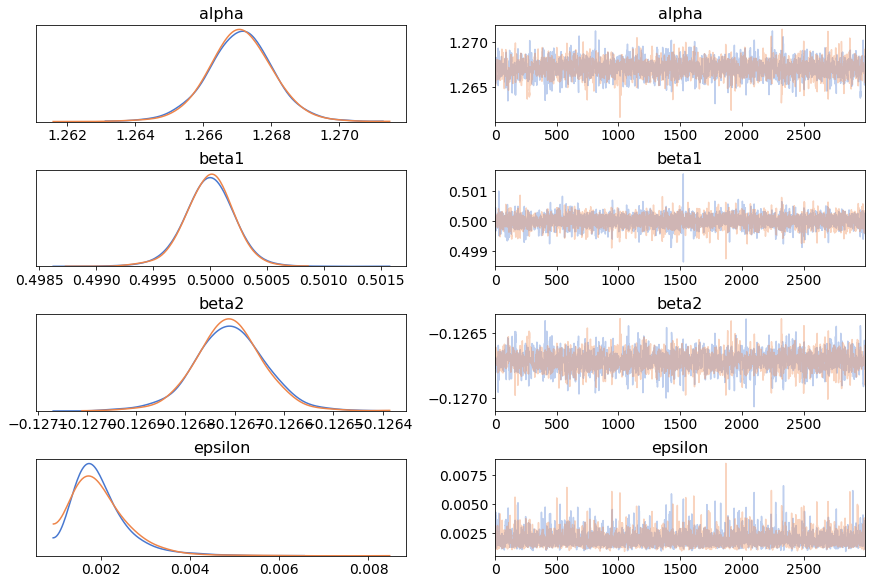

In [7]:
# Plot the traces
pm.traceplot(trace_poly)

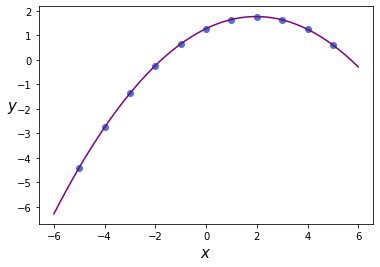

In [15]:
x_p = np.linspace(-6, 6)  # create a continuous line to serve as the skeleton for the fit
y_p = trace_poly['alpha'].mean() + trace_poly['beta1'].mean() * x_p + trace_poly['beta2'].mean() * x_p**2

plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation=0)
plt.plot(x_p, y_p, c='purple')